К вопросу об интерпретации результатов эксперимента Майкельсона Морли

А.Ю.Дроздов

Попытка интерпретации результатов эксперимента Майкельсона Морли, если нарисовать ход лучей в интерферометре Майкельсона в соответствии с идеями Довженко.

Идея Довженко в том, что физически луч представляет собой не тонкую линию, а имеет некоторую ширину, в связи с этим, если в теории эфира вертикально направленный (по рисунку) луч сносится эфирным ветром то обратно к полупрозрачному зеркалу он приходит не в ту же самую точку а с некоторым смещением, и далее его интерференция происходит уже с соседней "линией" исходного широкого луча 

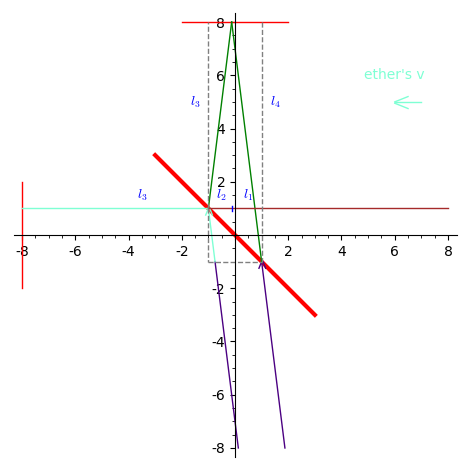

In [1]:
L = 8
v_c = 1/L

# mirrors
p = line([[3,-3],[-3,3]], color = "red", thickness=3)

p += line ([[-2,L],[2,L]], color = "red")
p += line ([[-L,-2],[-L,2]], color = "red")

# incoming light beam
p += line ([[-1+v_c*(L+1), -L],[-1+v_c*2,-1]], color = "indigo")
p += line ([[-1+v_c*2,-1],[-1,1]], color = "aquamarine")
p += line ([[-1.1,.75],[-1,1]], color = "aquamarine")
p += line ([[-0.85,.75],[-0.95,1]], color = "aquamarine")

p += line ([[1+v_c*(L-1),-L],[1,-1]], color = "indigo")
p += line ([[0.9,6.75-L],[1,-1]], color = "indigo")
p += line ([[1.15,6.75-L],[1.05,-1]], color = "indigo")

# up directed refracted beam
p += line ([[-1,1],[-v_c,L]], color = "green")

# down directed beam
p += line ([[-v_c,L],[1,-1]], color = "green")

# right - left directed beam
p += line ([[-1,1],[-L,1]], color = "aquamarine")

# right directed output beam
p += line ([[-1,+1],[L,+1]], color = "brown")

p += text("ether's v", [6, 6], color = "aquamarine")
p += line ([[6,5],[7,5]], color = "aquamarine")
p += line ([[6,5],[6.5,5.2]], color = "aquamarine")
p += line ([[6,4.95],[6.5,4.75]], color = "aquamarine")

p += text("$l_2$", [-.5, 1.5])
p += text("$l_1$", [.5, 1.5])
p += text("$l_3$", [-3.5, +1.5])

p += line ([[-v_c,1.1],[-v_c,0.9]])
# p += line ([[7,1.1],[7,0.9]])

# up directed refracted beam's catet
p += line ([[-1,1],[-1,L]], linestyle="dashed", color = "gray")
p += text("$l_4$", [1.5, 5])

# down directed beam's catet
p += line ([[1,L],[1,-1]], linestyle="dashed", color = "gray")
p += text("$l_3$", [-1.5, 5])

p += line ([[-1,-1],[1,-1]], linestyle="dashed", color = "gray")
p += line ([[-1,+1],[-1,-1]], linestyle="dashed", color = "gray")


p.show(aspect_ratio = 1, axes=True)

In [2]:
from IPython.display import display, Math, Latex

l_1 = var("l_1")
l_2 = var("l_2")
l_3 = var("l_3")
l_4 = var("l_4")

c = var("c")
v = var("v")
assume(c, "real")
assume(c > 0)
assume(v, "real")

Рассчитаем время хода луча параллельно скорости эфира.
Это время в официальных учебниках рассчитано правильно - с учётом закона сложения скоростей

In [3]:
# color = "aquamarine"
t_parallel = l_3 / (c - v) + l_3 / (c + v) \
           + (l_1 + l_2) / c # additional perpendicular path added 
                             # calculated by velocity c along vertical catet ((l_1 + l_2))

In [4]:
# additional perpendicular path
# lets calc it along hypotenuse
additional_path_along_hypotenuse = (l_1 + l_2) / cos(atan(v/c))
additional_path_along_hypotenuse

(l_1 + l_2)*sqrt(v^2/c^2 + 1)

In [5]:
velocity_along_additional_path_along_hypotenuse = sqrt(c^2+v^2)
velocity_along_additional_path_along_hypotenuse

sqrt(c^2 + v^2)

In [6]:
additional_time_along_hypotenuse = additional_path_along_hypotenuse / velocity_along_additional_path_along_hypotenuse
additional_time_along_hypotenuse.full_simplify()

(l_1 + l_2)/c

In [7]:
# additional perpendicular path
# lets calc it along the second (horizotal) catet
additional_path_along_horizotal_catet = (l_1 + l_2) * (v/c)
velocity_along_additional_path_along_horizotal_catet = v
additional_time_along_horizotal_catet = additional_path_along_horizotal_catet / velocity_along_additional_path_along_horizotal_catet
additional_time_along_horizotal_catet.full_simplify()

(l_1 + l_2)/c

In [8]:
display(Math(latex(t_parallel)))

<IPython.core.display.Math object>

Рассчитаем время хода луча перпендикулярно скорости эфира.
Здесь официальные учебники (например, Макс Борн. Эйнштейновская теория относительности) допускают две ошибки: 

1) во первых, официально здесь закон сложения скоростей не применяется, а было бы правильно его применять также и здесь (в векторном виде), поскольку он применяется при вычислении времени прохождения луча вдоль скорости эфира и с точки зрения эфирной теории это было бы последовательно

2) в официальных учебниках не учитывается дополнительное расстояние пройденное поперечным лучом возникающее в связи со сносом луча

Учитывая все это находим:

In [9]:
#color = "green"
t_perpendicular = l_3 / c + l_4 / c

In [10]:
display(Math(latex(t_perpendicular)))

<IPython.core.display.Math object>

Исходя из векторного закона сложения скоростей и простых геометрических соотношений находим

In [11]:
eq_l1 = l_1 == v/c*l_4
display(Math(latex(eq_l1)))

<IPython.core.display.Math object>

In [12]:
eq_l2 = l_2 == v/c*l_3
display(Math(latex(eq_l2)))

<IPython.core.display.Math object>

In [13]:
eq_l3 = l_1 + l_2 + l_3 == l_4
display(Math(latex(eq_l3)))

<IPython.core.display.Math object>

Теперь решаем полученную систему уравнений

In [14]:
eq_l4 = eq_l3.subs(eq_l1).subs(eq_l2)
display(Math(latex(eq_l4)))

<IPython.core.display.Math object>

In [15]:
l3 = solve(eq_l4, l_3)
display(Math(latex(l3)))

<IPython.core.display.Math object>

И таким образом находим время прохождения перпендикулярного луча

In [16]:
t_perpendicular = t_perpendicular.subs(eq_l1).subs(eq_l2).subs(l3)

In [17]:
display(Math(latex(t_perpendicular)))

<IPython.core.display.Math object>

In [18]:
display(Math(latex(t_perpendicular.full_simplify())))

<IPython.core.display.Math object>

In [19]:
t_parallel = t_parallel.subs(eq_l1).subs(eq_l2).subs(l3)

the difference between parallel and perpendicular time

In [20]:
display(Math(latex((t_parallel-t_perpendicular).full_simplify().factor())))

<IPython.core.display.Math object>

Это решение отличается от официально принятого $t_1-t_2 = \frac{l}{c} \frac{v^2}{c^2}$